In [1]:
%load_ext autoreload
%autoreload 2
import os 
os.chdir("..")


In [46]:

import sympy as s
import numpy as np
from utilities.misc import *
from scipy.linalg import solve_continuous_are
import matplotlib.pyplot as plt 

In [3]:
def get_ders():

    gamma = s.Symbol("gamma_val")
    omega = s.Symbol("omega_val") #freq harmonic oscillator
    eta = s.Symbol("eta_val") #efficiency measurement (appearing in the CPTP decomposiion X,Y)
    kappa = s.Symbol("kappa_val") #efficiency measurement (appearing in the CPTP decomposiion X,Y)
    n = s.Symbol("n_val") #n_th

    C = s.sqrt(4*eta*kappa)*np.array([[1,0],[0,1]]) #homodyne
    A = np.array([[-gamma/2, omega],[-omega, -gamma/2]])

    D = np.diag([(gamma*(n+0.5) + kappa)]*2)
    Lambda = s.Matrix(np.zeros((2,2)))

    varx = s.Symbol("vx")
    varp = s.Symbol("vp")
    covxp = s.Symbol("cvxp")

    cov = s.Matrix([[varx, covxp],[covxp, varp]])

    dots = np.array(A*cov + cov*(A.T) + D - (cov*C.T)*(C*cov))

    return [dots[0,0], dots[1,1], dots[0,1]]

numpy

In [32]:
gamma = s.Symbol("gamma")
omega = s.Symbol("omega") #freq harmonic oscillator
eta = s.Symbol("eta") #efficiency measurement (appearing in the CPTP decomposiion X,Y)
kappa = s.Symbol("kappa") #efficiency measurement (appearing in the CPTP decomposiion X,Y)
n = s.Symbol("n") #n_th

C = s.sqrt(4*eta*kappa)*np.eye(2)#np.array([[,0],[0,0]]) #homodyne
A = np.array([[-gamma/2, omega],[-omega, -gamma/2]])

D = np.diag([(gamma*(n+0.5) + kappa)]*2)
Lambda = s.Matrix(np.zeros((2,2)))

varx = s.Symbol("varx")
varp = s.Symbol("varp")
covxp = s.Symbol("covxp")

varx_th = s.Symbol("varx_th")
varp_th = s.Symbol("varp_th")
covxp_th = s.Symbol("covxp_th")

cov = s.Matrix([[varx, covxp],[covxp, varp]])
cov_th = s.Matrix([[varx_th, covxp_th],[covxp_th, varp_th]])

dots = np.array(A*cov + cov*(A.T) + D - (cov*C.T)*(C*cov))

[dots[0,0], dots[1,1], dots[0,1]]

[-4.0*covxp**2*eta*kappa + 2*covxp*omega - gamma*varx + gamma*(n + 0.5) + kappa - 4.0*varx**2*eta*kappa,
 -4.0*covxp**2*eta*kappa - 2*covxp*omega - gamma*varp + gamma*(n + 0.5) + kappa - 4.0*varp**2*eta*kappa,
 -covxp*gamma - 4.0*covxp*varp*eta*kappa - 4.0*covxp*varx*eta*kappa + omega*varp - omega*varx]

In [33]:
def ders(varx, varp, covxp, params):
    eta, gamma, kappa, omega, n = params
    return [-4.0*covxp**2*eta*kappa + 2*covxp*omega - gamma*varx + gamma*(n + 0.5) + kappa - 4.0*varx**2*eta*kappa,
 -4.0*covxp**2*eta*kappa - 2*covxp*omega - gamma*varp + gamma*(n + 0.5) + kappa - 4.0*varp**2*eta*kappa,
 -covxp*gamma - 4.0*covxp*varp*eta*kappa - 4.0*covxp*varx*eta*kappa + omega*varp - omega*varx]

In [56]:
params = give_def_params_discrimination(mode="frequencies")
gamma_val, omega_val, n_val, eta_val, kappa_val = params[1]

In [57]:
C_val = np.sqrt(4*eta_val*kappa_val)*np.array([[1,0],[0,1]]) #homodyne
A_val = np.array([[-gamma_val/2, omega_val],[-omega_val, -gamma_val/2]])
D_val = np.diag([gamma_val*(n_val+0.5) + kappa_val]*2)
Lambda_val = np.zeros((2,2))

sst = solve_continuous_are(A_val.T, C_val.T, D_val, np.eye(2)) #### A.T because the way it's implemented!
varx0, varp0, covxy0 = sst[0,0], sst[1,1], sst[1,0]

In [58]:
print(ders(varx0, varp0, covxy0, [eta_val, gamma_val, kappa_val, omega_val, n_val]))

[-1.3969838619232178e-09, 6.170012056827545e-09, 2.8294380172155797e-09]


In [59]:
sst

array([[ 5.00024999e-01, -7.11976002e-16],
       [-7.11976002e-16,  5.00024999e-01]])

In [65]:
def stat(gamma, omega, n, eta, kappa):
    suc = n + 0.5 + kappa/gamma
    sst = (gamma/(8*eta*kappa))*(np.sqrt(1 + 16*eta*kappa*suc/gamma ) + 1 )
    return suc, sst

suc0, sst0 = stat(gamma_val, omega_val, n_val, eta_val, kappa_val)
varx0, varp0, covxy0 = sst0 ,sst0 ,0.

In [71]:
params = give_def_params_discrimination(mode="frequencies")
gamma_val, omega_val, n_val, eta_val, kappa_val = params[1]
params[1]

[100, 10000.0, 1, 1, 1000000.0]

In [72]:
gamma_val, omega_val, n_val, eta_val, kappa_val = 1, 1, 1, 1, 1

In [73]:
(gamma_val/(8*eta_val*kappa_val))

0.125

In [107]:
def stat(gamma, omega, n, eta, kappa):
    suc = n + 0.5 + kappa/gamma
    sst = (gamma/(8*eta*kappa))*(np.sqrt(1 + 16*eta*kappa*suc/gamma ) - 1 )
    return suc, sst

suc0, sst0 = stat(gamma_val, omega_val, n_val, eta_val, kappa_val)
varx0, varp0, covxy0 = sst0 ,sst0 ,0.

In [105]:
varx0

0.9253905296791061

In [101]:
C_val = np.sqrt(4*eta_val*kappa_val)*np.array([[1,0],[0,1]]) #homodyne
A_val = np.array([[-gamma_val/2, omega_val],[-omega_val, -gamma_val/2]])
D_val = np.diag([gamma_val*(n_val+0.5) + kappa_val]*2)
Lambda_val = np.zeros((2,2))

sst = solve_continuous_are(A_val.T, C_val.T, D_val, np.eye(2)) #### A.T because the way it's implemented!
varx0, varp0, covxy0 = sst[0,0], sst[1,1], sst[1,0]

In [108]:
print(ders(varx0, varp0, covxy0, [eta_val, gamma_val, kappa_val, omega_val, n_val]))

[2.220446049250313e-16, 2.220446049250313e-16, 0.0]


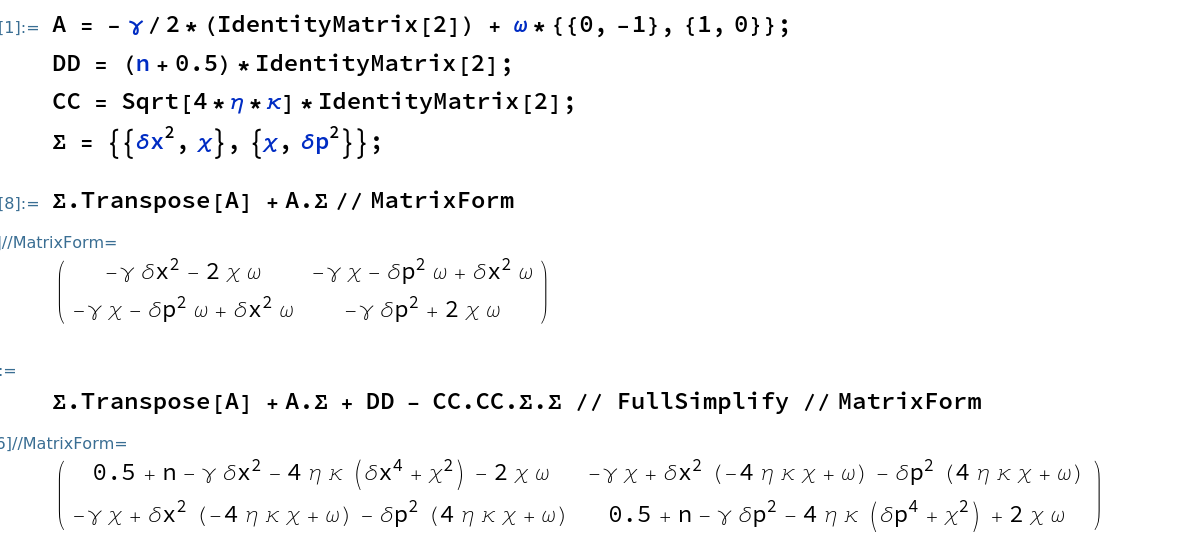

In [48]:
varss = []

for omega_val in np.linspace(1e-6,1e6, 1000):

    C_val = np.sqrt(4*eta_val*kappa_val)*np.array([[1,0],[0,1]]) #homodyne
    A_val = np.array([[-gamma_val/2, omega_val],[-omega_val, -gamma_val/2]])
    D_val = np.diag([gamma_val*(n_val+0.5) + kappa_val]*2)
    Lambda_val = np.zeros((2,2))

    sst = solve_continuous_are(A_val.T, C_val.T, D_val, np.eye(2)) #### A.T because the way it's implemented!
    varx0, varp0, covxy0 = sst[0,0], sst[1,1], sst[1,0]

    varss.append([varx0, varp0, covxy0])

In [49]:
varss = np.array(varss)

In [55]:
np.std(varss[:,2])

4.6024727631962825e-15

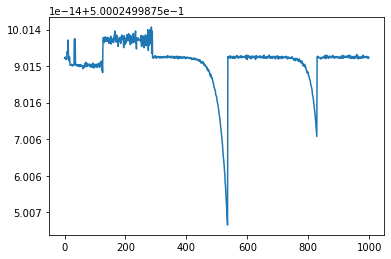

In [52]:
plt.plot(varss[:,0])

In [44]:
stats = np.array([stat(gamma_val, omega_val, n_val, eta_val, kappa_val) for omega_val in np.linspace(1,1e6,10000)])

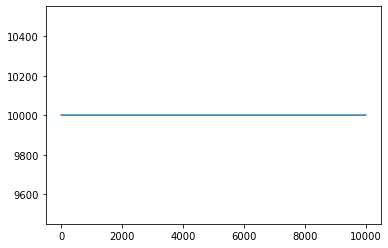

In [47]:
plt.plot(stats[:,0])

In [39]:
params = give_def_params_discrimination()
gamma, gamma1, omega, omega1, n, n1, eta, kappa = params

In [41]:

suc = n + 0.5 + kappa/gamma
sst = (gamma/(8*eta*kappa))*(np.sqrt(1 + 16*eta*kappa*smu0/gamma ) -1 )
sst

1.2999999999999998

In [48]:

suc = n + 0.5 + kappa/gamma
sst = (gamma/(8*eta*kappa))*(np.sqrt(1 + 16*eta*kappa*suc/gamma ) -1 )
sst

1.2999999999999998

In [57]:
gamma*(n+0.5)

6.1499999999999995

In [5]:
c = np.dot(np.eye(2),np.array([0,1]))
np.dot(c,c)

1.0

In [ ]:
print(dots)

def ders(varx, varp, covxp, params):
    eta, gamma, kappa, omega, n = params
    return [2*covxp*omega - 2*eta*kappa*(varx**2) - gamma*varx + gamma*(n + 0.5),
  -2*covxp*eta*kappa*varx - covxp*gamma + omega*varp - omega*varx,
  -2*(covxp**2)*eta*kappa - 2*covxp*omega - gamma*varp + gamma*(n + 0.5)]

In [18]:
varx = s.Symbol("varx")
varp = s.Symbol("varp")
covxp = s.Symbol("covxp")

varx_th = s.Symbol("varx_th")
varp_th = s.Symbol("varp_th")
covxp_th = s.Symbol("covxp_th")

cov = s.Matrix([[varx, covxp],[covxp, varp]])
cov_th = s.Matrix([[varx_th, covxp_th],[covxp_th, varp_th]])


dots_th = np.array(A_th*cov + cov*(A_th.T) + cov_th*(A.T) + A*cov_th   - cov_th*C.T*C*cov - cov*C.T*C*cov_th)
[dots_th[0,0], dots_th[0,1], dots_th[1,1]]

[2*covxp + 2*covxp_th*omega - 4*eta*kappa*varx*varx_th - gamma*varx_th,
 -2*covxp*eta*kappa*varx_th - 2*covxp_th*eta*kappa*varx - covxp_th*gamma + omega*varp_th - omega*varx_th + varp - varx,
 -4*covxp*covxp_th*eta*kappa - 2*covxp - 2*covxp_th*omega - gamma*varp_th]

In [19]:
ders_cov_th = lambda varx, varp, covxp, varx_th, varp_th, covxp_th: [2*covxp + 2*covxp_th*omega - 4*eta*kappa*varx*varx_th - gamma*varx_th,
 -2*covxp*eta*kappa*varx_th - 2*covxp_th*eta*kappa*varx - covxp_th*gamma + omega*varp_th - omega*varx_th + varp - varx,
 -4*covxp*covxp_th*eta*kappa - 2*covxp - 2*covxp_th*omega - gamma*varp_th]

In [20]:
ders_cov_th(varx, varp, covxp, varx_th, varp_th, covxp_th)

[2*covxp + 2*covxp_th*omega - 4*eta*kappa*varx*varx_th - gamma*varx_th,
 -2*covxp*eta*kappa*varx_th - 2*covxp_th*eta*kappa*varx - covxp_th*gamma + omega*varp_th - omega*varx_th + varp - varx,
 -4*covxp*covxp_th*eta*kappa - 2*covxp - 2*covxp_th*omega - gamma*varp_th]

In [156]:
params = give_def_params()
[eta_val, gamma_val, kappa_val, omega_val, n_val] = params

C_val = np.array([[np.sqrt(2*eta_val*kappa_val),0],[0,0]]) #homodyne
A_val = np.array([[-gamma_val/2, omega_val],[-omega_val, -gamma_val/2]])
D_val = np.diag([(gamma_val*(n_val+0.5))]*2)
Lambda_val = np.zeros((2,2))

sst = solve_continuous_are(A_val.T, C_val.T, D_val, np.eye(2)) #### A.T because the way it's implemented!
varx0, varp0, covxy0 = sst[0,0], sst[1,1], sst[1,0]

#ders = lambda varx, varp, covxp: [2*covxp*omega - 2*eta*kappa*varx**2 - gamma*varx + gamma*(n + 0.5), -2*covxp*eta*kappa*varx - covxp*gamma + omega*varp - omega*varx, -2*covxp**2*eta*kappa - 2*covxp*omega - gamma*varp + gamma*(n + 0.5)]
print(ders(varx0, varp0, covxy0, [eta_val, gamma_val, kappa_val, omega_val, n_val]))

[1.7703996491036378e-08, 5.587935447692871e-09, 1.4474835552391596e-08]


In [157]:
sst

array([[1.36861098e+00, 1.09428240e-04],
       [1.09428240e-04, 1.36861102e+00]])

In [20]:
dw = np.random.randn(12,3)
dw.shape[1]

3

In [106]:
sst = solve_continuous_are(a = A_val.T,b = C_val.T, q= D_val,r= np.eye(2), balanced=False)
sst

array([[1.36861098e+00, 1.09428240e-04],
       [1.09428240e-04, 1.36861102e+00]])

In [57]:
dots = np.array(A_val*cov + cov*A_val.T + D_val - (cov*(C_val.T) + Lambda_val.T)*((cov*(C_val.T) + Lambda_val.T)).T)


array([[-3.74619203330648*eta*kappa + gamma*(n + 0.5) - 1.36861098075868*gamma - 0.000218856480240049*omega,
        0.000299529382066727*eta*kappa + 0.000109428240120025*gamma + 3.68214481127893e-8*omega],
       [0.000299529382066727*eta*kappa + 0.000109428240120025*gamma + 3.68214481127893e-8*omega,
        -2.39490794715316e-8*eta*kappa + gamma*(n + 0.5) - 1.36861101758013*gamma + 0.000218856480240049*omega]],
      dtype=object)

In [68]:
gamma = s.Symbol("gamma")
omega = s.Symbol("omega") #freq harmonic oscillator
eta = s.Symbol("eta") #efficiency measurement (appearing in the CPTP decomposiion X,Y)
kappa = s.Symbol("kappa") #efficiency measurement (appearing in the CPTP decomposiion X,Y)
n = s.Symbol("n") #n_th

C = np.array([[s.sqrt(2*eta*kappa),0],[0,0]]) #homodyne
A = np.array([[-gamma/2, omega],[-omega, -gamma/2]])
D = np.diag([(gamma*(n+0.5))]*2)
Lambda = s.Matrix(np.zeros((2,2)))

varx = s.Symbol("varx")
varp = s.Symbol("varp")
covxp = s.Symbol("covxp")

cov = s.Matrix([[varx, covxp],[covxp, varp]])
dots = np.array(A*cov + cov*A.T + D - (cov*(C.T) + Lambda.T)*((cov*(C.T) + Lambda.T)).T)

In [69]:
dots

array([[2*covxp*omega - 2*eta*kappa*varx**2 - gamma*varx + gamma*(n + 0.5),
        -2*covxp*eta*kappa*varx - covxp*gamma + omega*varp - omega*varx],
       [-2*covxp*eta*kappa*varx - covxp*gamma + omega*varp - omega*varx,
        -2*covxp**2*eta*kappa - 2*covxp*omega - gamma*varp + gamma*(n + 0.5)]],
      dtype=object)

In [25]:

params[-2] = 0.04
omega = params[-2]
C = np.array([[np.sqrt(2*eta*kappa),0],[0,0]]) #homodyne
A = np.array([[-gamma/2, omega],[-omega, -gamma/2]])
D = np.diag([(gamma*(n+0.5))]*2)
Lambda = np.zeros((2,2))

[-4.9075142669607885e-05, 1.0814478324940298, 4.907514744445507e-05]

In [24]:
sst

array([[ 1.36861098e+00, -1.09428240e-04],
       [-1.09428240e-04,  1.36861102e+00]])

In [ ]:
N = s.Symbol("N") #n_th


In [24]:
Cint = -s.sqrt(gamma)*Omega # -\ii \Sigma_y

aint = Omega*Cint*Omega*(Cint.T)/2
Hs = s.eye(2)*omega
asys = Omega*Hs
A_matrix = aint + asys ##drift matrix
#D_matrix = Omega*Cint*sigma_b*(Omega*Cint).T  #difussion matrix
D_matrix = s.Matrix(np.diag([gamma*(n + 0.5)]*2))
Gamma_matrix = s.Matrix(np.zeros((2,2)))
C_matrix = s.Matrix(np.array([[s.sqrt(2*eta*kappa),0],[0,0]]))

In [25]:
varx, varp, covxp = [s.Symbol(k) for k in ["varx","varp","covxp"]]
cov = s.Matrix([[varx, covxp],[covxp, varp]])

ChiCov = cov*C_matrix.T + Gamma_matrix.T

In [26]:
dots = np.array(A_matrix*cov + cov*A_matrix.T + D_matrix - ChiCov.T*ChiCov)
ders = dots[0,0], dots[0,1], dots[1,1]
[ders]

[(-2*covxp**2*eta*kappa + 2*covxp*omega - gamma*varx + gamma*(n + 0.5) - 2*varx**2*eta*kappa,
  -covxp*gamma + omega*varp - omega*varx,
  -2*covxp*omega - gamma*varp + gamma*(n + 0.5))]

In [27]:
#noisy heterodyne measurement
S = s.eye(2) 
sigma_m = S*(S.T)
##lossy part
Xstar = s.eye(2)/s.sqrt(eta)
Ystar = s.eye(2)*(1-eta)/eta
sigma_noisy_m = Xstar*(sigma_m)*(Xstar.T) + Ystar

# state of B, subsystem being measured
sigma_b = (2*N +1)*s.eye(2)

Gamma_matrix = Omega*Cint*sigma_b   #auxiliar matrix for the ricatti

C_matrix = (Cint*Omega*(sigma_b + sigma_noisy_m)**(-1/2)).T

In [28]:
from scipy.linalg import solve_continuous_are
A_tilde_matrix = A_matrix - (Omega*Cint*sigma_b*((sigma_b + sigma_noisy_m)**(-1))*Omega*Cint.T   )
D_tilde_matrix = D_matrix + (Omega*Cint*sigma_b*((sigma_b + sigma_noisy_m)**(-1))*sigma_b*Cint.T*Omega)
B_matrix = Cint*Omega*(sigma_b + sigma_noisy_m)**(-1/2)

Ar, Br, Dr = [np.array(k.subs({omega:2*np.pi, N:2, eta:0.8, gamma:0.3})).astype(np.float32) for k in [A_tilde_matrix, B_matrix, D_tilde_matrix]]

TypeError: can't convert expression to float

In [6]:
## interaction hamiltonian between the train of modes being measured and system

Cint = -s.sqrt(gamma)*Omega # -\ii \Sigma_y
s.Matrix(Omega)*(s.Matrix(Cint))
Hint = np.block([[s.zeros(2), Cint], [Cint.T, s.zeros(2)]])/2

xs, ps, xb, pb = s.Symbol("xs"), s.Symbol("ps"), s.Symbol("xb"), s.Symbol("pb")

print((s.Matrix([xs,ps,xb,pb]).T)*Hint*s.Matrix([xs,ps,xb,pb])) #BS splitter
aint = Omega*Cint*Omega*(Cint.T)/2
Hs = s.eye(2)*omega
asys = Omega*Hs


Matrix([[-sqrt(gamma)*pb*xs + sqrt(gamma)*ps*xb]])


In [7]:
#noisy heterodyne measurement
S = s.eye(2) 
sigma_m = S*(S.T)
##lossy part
Xstar = s.eye(2)/s.sqrt(eta)
Ystar = s.eye(2)*(1-eta)/eta
sigma_noisy_m = Xstar*(sigma_m)*(Xstar.T) + Ystar

# state of B, subsystem being measured
sigma_b = (2*N +1)*s.eye(2)

Gamma_matrix = Omega*Cint*sigma_b   #auxiliar matrix for the ricatti

C_matrix = (Cint*Omega*(sigma_b + sigma_noisy_m)**(-1/2)).T

 Ricatti equation for covariance

In [13]:
A_matrix

Matrix([
[-gamma/2,    omega],
[  -omega, -gamma/2]])

In [14]:
from scipy.linalg import solve_continuous_are
A_tilde_matrix = A_matrix - (Omega*Cint*sigma_b*((sigma_b + sigma_noisy_m)**(-1))*Omega*Cint.T   )
D_tilde_matrix = D_matrix + (Omega*Cint*sigma_b*((sigma_b + sigma_noisy_m)**(-1))*sigma_b*Cint.T*Omega)
B_matrix = Cint*Omega*(sigma_b + sigma_noisy_m)**(-1/2)

In [15]:
Ar, Br, Dr = [np.array(k.subs({omega:2*np.pi, N:2, eta:0.8})).astype(np.float32) for k in [A_tilde_matrix, B_matrix, D_tilde_matrix]]

TypeError: can't convert expression to float

In [164]:
cov_stat = solve_continuous_are(Ar, Br, Dr, np.eye(2))

In [166]:
varx, varp, covxp = [s.Symbol(k) for k in ["varx","varp","covxp"]]
cov = s.Matrix([[varx, covxp],[covxp, varp]])

In [191]:
varx, varp, covxp = [s.Symbol(k) for k in ["varx","varp","covxp"]]
cov = s.Matrix([[varx, covxp],[covxp, varp]])

dots = np.array(A_tilde_matrix*cov + cov*A_tilde_matrix.T + D_tilde_matrix - B_matrix*B_matrix.T)
ders = dots[0,0], dots[0,1], dots[1,1]
[ders]

[(2*N + 2*covxp*omega + 2*varx*((2*N + 1)/(2*N + 1 + (1 - eta)/eta + 1/eta) - 1/2) - (2*N + 1)**2/(2*N + 1 + (1 - eta)/eta + 1/eta) - (2*N + 1 + (1 - eta)/eta + 1/eta)**(-1.0) + 1,
  2*covxp*((2*N + 1)/(2*N + 1 + (1 - eta)/eta + 1/eta) - 1/2) + omega*varp - omega*varx,
  2*N - 2*covxp*omega + 2*varp*((2*N + 1)/(2*N + 1 + (1 - eta)/eta + 1/eta) - 1/2) - (2*N + 1)**2/(2*N + 1 + (1 - eta)/eta + 1/eta) - (2*N + 1 + (1 - eta)/eta + 1/eta)**(-1.0) + 1)]

In [49]:
a = ders[0]

'-2*covxp**2*eta*kappa + 2*covxp*omega - gamma*varx + gamma*(n + 0.5) - 2*varx**2*eta*kappa'

In [ ]:
def Euler(ff, G, y0, tspan, dt,**kwargs):
    exp = kwargs.get("exp",False)
    N = len(tspan)
    y = np.zeros((N, len(y0)))
    y[0] = y0

    if exp is True:
        dint = 1.
    else:
        dint= dt

    for ind,t in enumerate(tqdm(tspan[:-1])):
        #dW = np.random.normal(0,np.sqrt(dt), (7))
        w0 = np.random.normal()*np.sqrt(dt)
        w1 = np.random.normal()*np.sqrt(dt)
        dW = np.array([w0, w1, w0, w1 , 0.,0.,0.])
        y[ind+1] = y[ind] + ff(y[ind], t, exp=exp, dt=dt)*dint + np.dot(G(y[ind], t), dW)
    return y

In [194]:
from integrate import *

In [202]:
x0 = 1.
p0 = 0.
yx0 = 0.
yp0 = 0.
varx0 = 1.
varp0 = 1.
covxy0 = 0.
s0 = np.array([x0, p0, yx0, yp0, varx0, varp0,covxy0])

gamma = 0.3
N = 2.0
eta = 0.8

periods = 10
ppp=1000
dt = 1/ppp
times = np.arange(0.,periods+dt,dt)

global C, A , D 
C = C_matrix
D = D_matrix
A = A_matrix


coeffs = [C, A, D , dt]
params = [eta, gamma, omega, N]

solution = RosslerSRI2(Fs, Gs, s0, times, dt)

  0%|          | 0/10000 [00:00<?, ?it/s]


NameError: name 'A' is not defined